# Bin Packing Lab

- Authors:
  - Jinal Kasturiarachchi, kasturij@mcmaster.ca
  - Maged Armanios, armanm5@mcmaster.ca
- Group ID on Avenue: binpack 32
- Gitlab URL: https://gitlab.cas.mcmaster.ca/kasturij/l2-bin-packing

## T1

### Explanation of how the code follows SOLID Principles

S: The single responsibility principle states that each class should only have one purpose. The sample code provided included four classes, these classes are BinPPReader, NextFit_ON, NextFit_Off, and BenMaier. Additionally there are other interfaces and abstract classes. Amongst the four, they only have one specific responsibility. BinPP is used to read data in the BinPP format, BenMaier solves the Binpacking problem using the BenmMaire algorithm, and the nextfit classes solve the problem using the nextfit algorithm (either offline or online).

O: The open closed principle states that objects or entities should be open for extension but closed for modification. In addition the the classes provided, the code includes a set of abstract classes. These include Online, Offline, and DatasetReader. These classes contain abstract methods that allow us to implement different algorithms/readers. Such as creating a specific data set reader to read the BinPP format without having to modify and existing code (Dataset reader) or implmenenting a new offline algorithm without having to modify current code (Abstract Class Offline)

L: Liskov's substitution principle states that properties on objects of a certain type T hold for objects of type S which are substypes of T. As of now we don't have any subclasses, rather we have implementations of abstract classes so we will forget about Liskov's rule for now

I: Interface segregation states that no code should be forced to depend on methods it does not use. The given code follows this principle by implementing abstract methods which are changed depending on the use case of the class. Such as \_load_data_from_disk() and \_process()

D: Dependancy Inversion has two components. 
1. High-level modules should not import anything from low-level modules; they should both depend on abstractions
2. Abstractions should not depend on concrete implementations; concrete implementations should depend on abstractions

The starting code does not violate either of these two rules. Online, offline, and Dataset reader do not depend on any concretions while BinppReader, BenMaier, Nextfit_off/On rely on abstract classes only and feature no imports from low level modules.

### Dimensions of the dataset

For the data, there are three parameters to take into account.
1. The amount of items 
2. The weights of each item
3. The bin capacity

These parameters are important because adjusting them can help us model real world problems. For example, an Amazon warehouse may receive many items of small weights and have medium bin capacities. By using the datasets with these characteristics, we can produce implementations of a variety of algorithms to solve the given scenarios presented in the lab description. 

### Worst Possible Solution
The worst possible solution would be to provide every item with its own bin. In general, for a list of items (weights) $W$, it returns $N = len(W)$ bins of size $w_0, w_1, ... w_{N-1}$ where $w_i \in W$

In [1]:
from macpacking.reader import BinppReader, DatasetReader
from macpacking.model import Offline, Online
import macpacking.algorithms.online as online
import macpacking.algorithms.offline as offline

dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
strategy: Online = online.WorstSolution()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 50
[[8], [8], [12], [13], [13], [14], [15], [17], [18], [19], [20], [23], [30], [37], [37], [39], [40], [43], [43], [44], [44], [50], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


## T2

## Demonstration of Various Algorithms

In [2]:
strategy: Online = online.FirstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44], [44, 43, 13], [50, 43], [51, 39], [61, 13, 20], [61, 37], [62, 23, 15], [62, 37], [63], [66, 30], [67], [69, 8, 18], [70], [71], [72, 14, 12], [75], [76], [76], [79, 19], [83], [83, 17], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


In [3]:
strategy: Online = online.BestFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44, 12], [44, 43, 13], [50, 43], [51], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67, 30], [69, 17, 14], [70, 18, 8], [71], [72, 23], [75], [76], [76, 19], [79, 20], [83, 13], [83, 15], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


In [4]:
strategy: Online = online.WorstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 33
[[37, 43], [39, 19], [40, 8, 18, 13], [44, 43], [44, 50], [51, 30], [61, 13], [61, 20], [62, 23], [62, 37], [63, 17], [66, 15], [67, 14], [69, 8], [70, 12], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


In [5]:
strategy: Offline = offline.FirstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}') 

nb_bins = 31
[[40], [43, 43], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71, 13], [72, 14, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


In [6]:
strategy: Offline = offline.BestFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


In [7]:
strategy: Offline = offline.WorstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 39, 8], [43, 43], [50, 44], [51, 44], [61, 37], [61, 37], [62, 23], [62, 30], [63, 20], [66, 19], [67, 18], [69, 17], [70, 15], [71, 14], [72, 13], [75, 13], [76, 8], [76, 12], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


### Analysis of the algorithms - N1C3W2

![offline_t2.png](./analysis_tools/outputs/offline_t2.png)

![online_t2.png](./analysis_tools/outputs/online_t2.png)

Note: Error bars omitted because they clutter the graph and make it too hard to read. To see error bars, go to ./analysis_tools/bench_grapher.py and uncomment the block comments containing "plt.errorbar(...

In terms of runtime, the offline algorithms all take significantly longer than their online counterparts. This is likely due to the offline algorithms sorting the data before running the same algorithm as their online counterpart. 

Amongst the online algorithms, the worst solution takes the least amount of time, averaging ~15 ns less than other algorithms. We suspect this is due to the algorithm not having any actual logic in its design to reduce the number of bins used, resulting in a minimal runtime.

For the offline algorithms, nextFitOff takes drastically less time than all the other algorithms. We are unsure as to why this is the case, as its online counterpart is argueably the slowest online algorithm. Perhaps the combination of a sorted dataset and the algorithm allow it to run at its fastest. Bestfit and Worstfit almost take the same amount of time. This is most likely due to the algorithms having identical logice, apart from one of them keeping track of the most full bin while the other utilizes the least full bin in its calculation.

Benchmarking these algorithms in terms of runtime is relvant and important because some applications of the BinPP problem require quick computations. For example, a group of servers distributing network traffic could be seen as an online Multiway Partitioning problem (which can be implemented with a binPP algorithm). If the algorithm were to take too long, traffic would come in faster than it can compute which server to use, leading to increased load times for users.

## T3

### Solution Reader

In [8]:
from macpacking.reader import SolutionReader

In [9]:
fileList = ['./_datasets/binpp/N4C2W2/N4C2W2_A.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_B.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_C.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_D.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_E.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_F.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_G.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_H.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_I.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_J.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_K.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_L.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_M.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_N.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_O.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_P.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_Q.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_R.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_S.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_T.BPP.txt']
solutionFile = './_datasets/solutions/binpp.csv'
reader = SolutionReader(fileList, solutionFile)
result = reader.readSolutions()
print(result)

[253, 254, 249, 258, 257, 272, 252, 255, 262, 256, 259, 263, 261, 264, 253, 266, 257, 256, 273, 256]


### Improvement Margins

In [10]:
from analysis_tools.improvement_margin import run_analyze_correctness, list_case_files
from macpacking.algorithms.offline import NextFitOff as NFOff, WorstFitOff as WFOff, BestFitOff as BFOff, FirstFitOff as FFOff
from macpacking.algorithms.online import NextFitOn as NFOn, WorstSolution as WS, WorstFitOn as WFOn, BestFitOn as BFOn, FirstFitOn as FFOn
from macpacking.algorithms.baseline import BenMaier
import matplotlib.pyplot as plt


In [11]:
CASESFifty = './_datasets/binpp/N1C2W2'
CASESHundred = './_datasets/binpp/N2C2W2'
CASESTwohundred = './_datasets/binpp/N3C2W2'
CASESFivehundred = './_datasets/binpp/N4C2W2'
OFFLINE_STRATEGIES = [
    NFOff, WFOff, BFOff, FFOff, BenMaier
]

ONLINE_STRATEGIES = [
    NFOn, WS, WFOn, BFOn, FFOn
]

casesFifty = list_case_files(CASESFifty)
casesHundred = list_case_files(CASESHundred)
casesTwohundred = list_case_files(CASESTwohundred)
casesFivehundred = list_case_files(CASESFivehundred)

[avg_excess_fifty, correct_percentage_fifty] = run_analyze_correctness(casesFifty, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_hundred, correct_percentage_hundred] = run_analyze_correctness(casesHundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_twohundred, correct_percentage_twohundred] = run_analyze_correctness(casesTwohundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_fivehundred, correct_percentage_fivehundred] = run_analyze_correctness(casesFivehundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
# for funcName in avg_excess:
#     print(f'{funcName} mean excess {avg_excess[funcName]}')
#     print(f'{funcName} Correct % = {correct_percentage[funcName]}')
#     print()

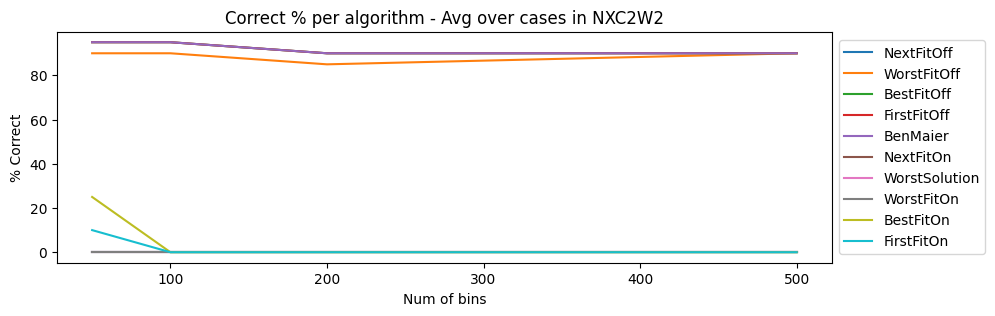

In [12]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[correct_percentage_fifty[i],
                               correct_percentage_hundred[i],
                               correct_percentage_twohundred[i],
                               correct_percentage_fivehundred[i]], 
                               label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('% Correct')
plt.title('Correct % per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

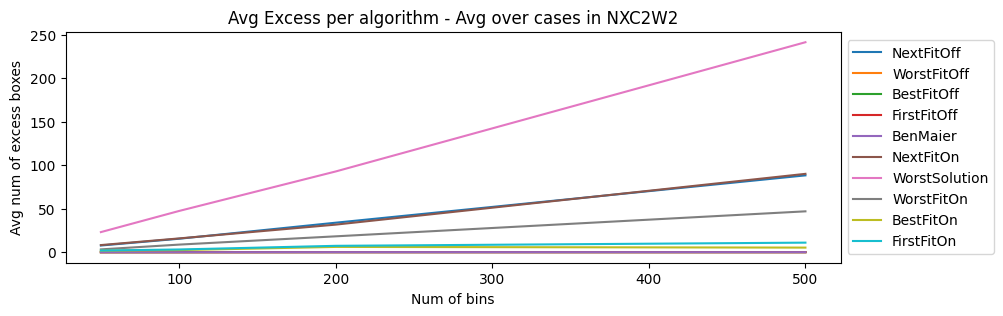

In [13]:
plt.figure(figsize=(10,3))

for i in avg_excess_fifty:
    plt.plot([50,100,200,500],[avg_excess_fifty[i],
                               avg_excess_hundred[i],
                               avg_excess_twohundred[i],
                               avg_excess_fivehundred[i]], 
                               label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('Avg num of excess boxes')
plt.title('Avg Excess per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Analysis of the algorithms 
For T3, we chose to increase the number of bins while maintaining a fixed bin capacity and weight size. We chose this since we believe in real life applications of Bin packing, the most drastic change you can make to the problem is adjusting the number of items given. By increasing the number of items, we can start seeing which algorithms struggle with large volumes of inputs. Additionally, adjusting the number of inputs is the most easy to understand metric for us. Bin capacity and weight are arbitrary, but when you decide to use 200 items, you understand clearly what that means and how to interpret it.

Our two KPIs were how often the algorithms got the correct solution, and how many excess bins were used on average. We tested our algorithms using 100 bin capacity and a weight interval of 20-100.
We incremented the number of bins and tested to see how the performance would change as we increased the number of bins.
Some notable observations are that worst solution always uses the most number of bins. This is because it always assigns an object to its own bin so this is expected. Other algorithms like firstfit and worstfit used a low amount of excess bins and were correct the most. From this preliminary analysis, we can see that our firstfitOff and worstfitOff appear to be the most ideal 

## T4 - Refined First Fit

Task four had us implement the Refined First Fit algorithm, which would use a heuristic to classify bins and weights. There are for classes of bins called 1-4, and four item classes. A, B1, B2, and X. Each item goes into the corresponding bin under the following rules:<br>
        &nbsp;&nbsp;&nbsp;let m = [6,7,8,9] and k an integer >= 1, item i goes into a bin in<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 1, if i is an A-piece<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 2, if i is an B1-piece<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 3, if i is an B2-piece, but not the (mk)th B2-piece we've seen so far<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 1, if i is the (mk)th B2-piece we've seen so far<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 4, if i is an X-piece<br>

In [14]:
from macpacking.algorithms.online import RefinedFirstFitOn as RffOn
from macpacking.algorithms.offline import RefinedFirstFitOff as RffOff
[avg_excess_fifty, correct_percentage_fifty] = run_analyze_correctness(casesFifty, [RffOn,RffOff])
[avg_excess_hundred, correct_percentage_hundred] = run_analyze_correctness(casesHundred, [RffOn,RffOff])
[avg_excess_twohundred, correct_percentage_twohundred] = run_analyze_correctness(casesTwohundred, [RffOn,RffOff])
[avg_excess_fivehundred, correct_percentage_fivehundred] = run_analyze_correctness(casesFivehundred, [RffOn,RffOff])

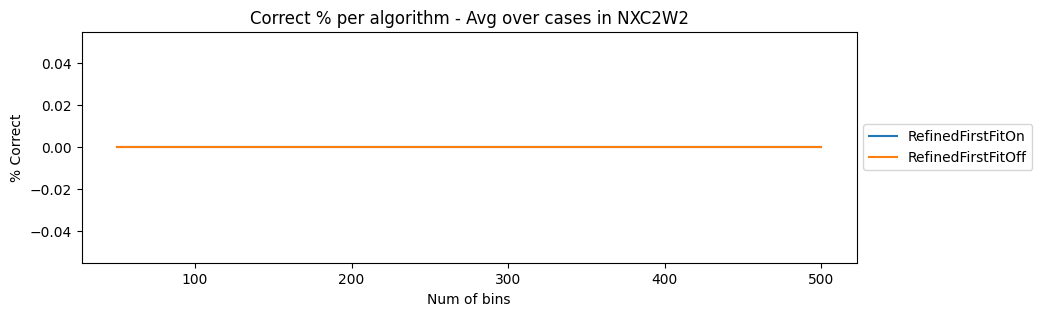

In [15]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[correct_percentage_fifty[i],
                               correct_percentage_hundred[i],
                               correct_percentage_twohundred[i],
                               correct_percentage_fivehundred[i]], 
                               label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('% Correct')
plt.title('Correct % per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The RFF algorithm over variable amounts of items, consitent weight ranges and consistent bin capacities fails to achieve a correct result even once. This does not mean it performs poorly, but if getting the most optimal solution is a key factor in a bin packing scenario, this algorithm would not be an ideal choice.

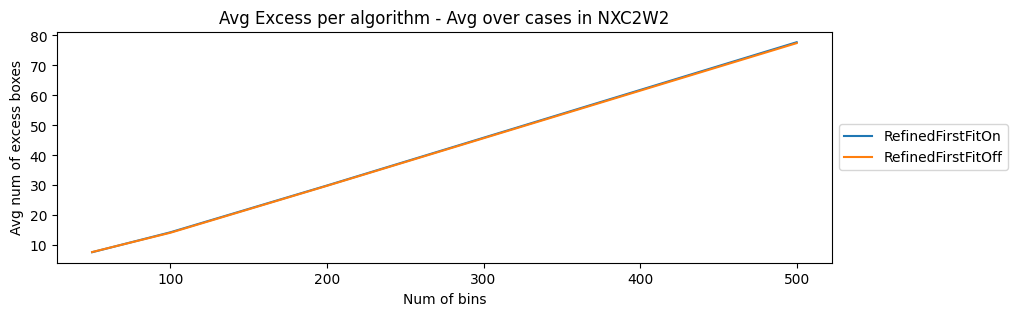

In [16]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[avg_excess_fifty[i],
                               avg_excess_hundred[i],
                               avg_excess_twohundred[i],
                               avg_excess_fivehundred[i]], 
                               label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('Avg num of excess boxes')
plt.title('Avg Excess per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The average number of excess bins increases linearly over an increasing number of items. The trendline is very similar to NFOn/NFOff, making this algorithm's performance for excess bins worse than all T2 algorithms except for the worse solution. 

![online_t4.png](./analysis_tools/outputs/online_t4.png)

![offline_t4.png](./analysis_tools/outputs/offline_t4.png)

Note: Error bars omitted because they clutter the graph and make it too hard to read. To see error bars, go to ./analysis_tools/bench_grapher.py and uncomment the block comments containing "plt.errorbar(...

### Analysis of RFF
Refined first fit takes the longest amount of time out of any algorithm we have seen so far. Surpassing all other online algorithms by approximately at least 40 ns. This is probably due to it having to classify each item. It also used an excess amount of bins similar to nextfit. In general, we can conclude this algorithm is not an improvement in terms of accuracy compared to algorithms like bestfit.

## T5 - Multiway Number Partitioning

In this section, rather thn finding a minimal number of bins, we must divide the weights of the items over a fixed number boxes.

### What can we reuse?
Our KPIs from the last tasks (running time, % excess, avg excess) with the exception of runtime become inadequate to evaluate this version of the problem. Solutions of the MNP problem always have the same k amount of bins, so % excess and avg excess would always be 0. This doesn't mean all our old code was unusable however, some algorithms for MNP use binpacking algorithms alongside binary search to compute the result, the readers are still needed for retrieving input to the problem and the solution is still of the same format. So from inspection, we can conclude our algorithms and reader to still be useful.

In [17]:
from macpacking.reader import DatasetReader, BinppReader, JburkardtReader, 
                              SolutionReader
from macpacking.model import Online, Offline
from macpacking.multiway_adapter import MultiwayAdapter
import macpacking.algorithms.offline as offline
import macpacking.algorithms.online as online
import macpacking.algorithms.baseline as baseline

In [18]:
c_file = '_datasets/jburkardt/p04_c.txt'
w_file = '_datasets/jburkardt/p04_w.txt'
reader: DatasetReader = JburkardtReader(c_file, w_file) 
print(f'Capacity File: {c_file}')
print(f'Weights File: {w_file}')
print(f'  - Number of Bins: {MultiwayAdapter.to_multiway(reader.offline(),20)[0]}')
print(f'  - Objects to pack: {MultiwayAdapter.to_multiway(reader.offline(),20)[1]}')

Capacity File: _datasets/jburkardt/p04_c.txt
Weights File: _datasets/jburkardt/p04_w.txt
  - Number of Bins: 20
  - Objects to pack: [10, 252, 127, 106, 10, 127, 37, 106, 127, 106, 46, 12, 127, 10, 12, 252, 10, 442, 9, 106, 84, 252, 85, 37, 252, 10, 252, 10, 9, 127, 12, 252, 252]


Using the binpacking library, we can import a baseline for the MultiwayNumberPartitioning problem.

In [19]:
strategy: Offline = baseline.MultiwayNumberPartitioning()
result = strategy(MultiwayAdapter.to_multiway(reader.offline(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[127, 127, 85, 84], [252, 106, 12, 12, 10, 9], [252, 106, 37], [252, 106, 37, 9], [252, 106, 46], [252, 127, 10, 10], [252, 127, 10, 10], [252, 127, 12, 10], [442]]

max_bin_size = 395


In [20]:
strategy: Online = online.EmptiestBinOn()
result = strategy(MultiwayAdapter.to_multiway(reader.online(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[10, 46, 10, 12, 252], [10, 106, 9, 84, 10, 127], [37, 12, 127, 10, 252], [106, 10, 106, 252], [106, 442], [127, 37, 252], [127, 85, 9, 12, 252], [127, 252], [252]]

max_bin_size = 252


In [21]:
strategy: Offline = offline.EmptiestBinOff()
result = strategy(MultiwayAdapter.to_multiway(reader.offline(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[127, 127, 85, 84], [252, 106, 12, 12, 10, 9], [252, 106, 37], [252, 106, 37, 9], [252, 106, 46], [252, 127, 10, 10], [252, 127, 10, 10], [252, 127, 12, 10], [442]]

max_bin_size = 395


In [22]:
strategy: Offline = offline.Multifit()
result = strategy(MultiwayAdapter.to_multiway(reader.offline(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[106, 106, 85], [252, 106], [252, 106, 84], [252, 127], [252, 127, 10, 10, 10, 10, 9, 9], [252, 127, 37, 10, 10], [252, 127, 37, 12, 12], [252, 127, 46, 12], [442]]

max_bin_size = 297


### Analyzing Our Algorithms 
To analyze our algorithm, we compare it with the BP libraries MultiwayNumberPartitioning method. We will analyze our algorithm's runtime and the maximum size of any of the bins. We believe this is an ideal KPI for this problem because if the max size of any bin is minimized, we are ensuring that every bin (server, box, container if this were a real life application) is bearing as little load as it can given a set of items. 

#### Runtime

![t5.png](./analysis_tools/outputs/t5.png)

In the above image, we can see that our emptiestbin algorithm performs significantly faster than the baseline algorithm, however it is difficult to see how the online and offline versions of the algorithm compare to each other.

![t5_no_bench.png](./analysis_tools/outputs/t5_no_bench.png)

In the above graph, we compare the offline (decreasing) version of the algorithm to its online counterpart. We see that the offline version of the algorithm runs slower than its online counterpart. This observation makes sense since the offline version of the algorithm is the same as the online, but it sorts the data in descending order first, increasing the runtime.

#### Maximal/Minimal Bin Weight

Our next two KPIs are the maximal and minimal bin weight of the produced results. Maximal bin size is an important KPI because if you were trying ensure non of your bins (server, containers, etc) are taking on the least weight possible, you would use an algorithm which minimizes this KPI. The minimal bin size, if maximized ensures an even distribution amongst the lowest number of bins. Therefore, if a scenario has an flat cost per bin (server, container, etc), an algorithm which maximizes minimal bin weight would be ideal.

In [23]:
from analysis_tools.improvement_margin import(
    list_case_files,
    find_max_bin_size_fixed_k,
    find_min_bin_size_fixed_k,
    find_max_bin_size_var_k,
    find_min_bin_size_var_k
)

import macpacking.algorithms.baseline as baseline
from macpacking.reader import DatasetReader, BinppReader, SolutionReader
from macpacking.multiway_adapter import MultiwayAdapter

In [24]:
cases = list_case_files("./_datasets/binpp-hard")
case = "./_datasets/binpp-hard/HARD0.BPP.txt"
binCount = 80
lower = 75
upper = 85

ONLINE_STRATEGIES = [
    online.EmptiestBinOn
]
OFFLINE_STRATEGIES = [
    offline.EmptiestBinOff,
    baseline.MultiwayNumberPartitioning,
    offline.Multifit
]
# Compute minimal and maximal bin weights for variable and fixed (k)s
# Note, this takes a while to run
min_fixed = find_min_bin_size_fixed_k(cases, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, binCount)
max_fixed = find_max_bin_size_fixed_k(cases, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, binCount)
min_var = find_min_bin_size_var_k(case, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, lower,upper)
max_var = find_max_bin_size_var_k(case, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, lower,upper)


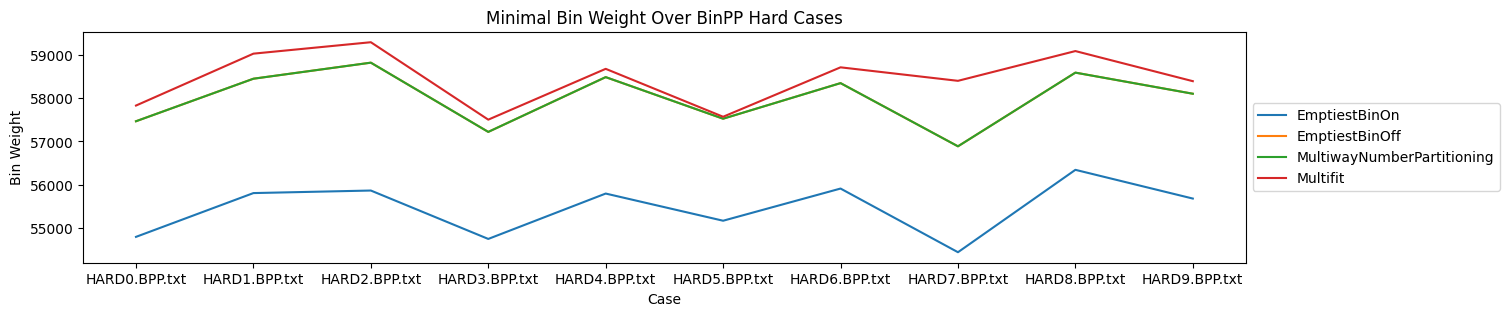

In [25]:
plt.figure(figsize=(15,3))

for i in min_fixed:
    plt.plot([j for j in min_fixed[i]], min_fixed[i].values(), label = i)

plt.xlabel('Case')
plt.ylabel('Bin Weight')
plt.title('Minimal Bin Weight Over BinPP Hard Cases')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

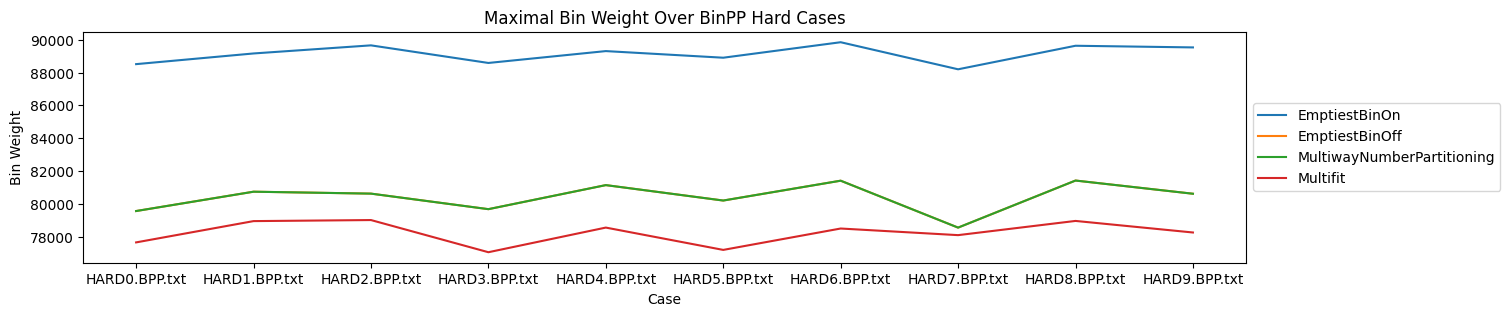

In [26]:
plt.figure(figsize=(15,3))

for i in max_fixed:
    plt.plot([j for j in max_fixed[i]], max_fixed[i].values(), label = i)

plt.xlabel('Case')
plt.ylabel('Bin Weight')
plt.title('Maximal Bin Weight Over BinPP Hard Cases')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

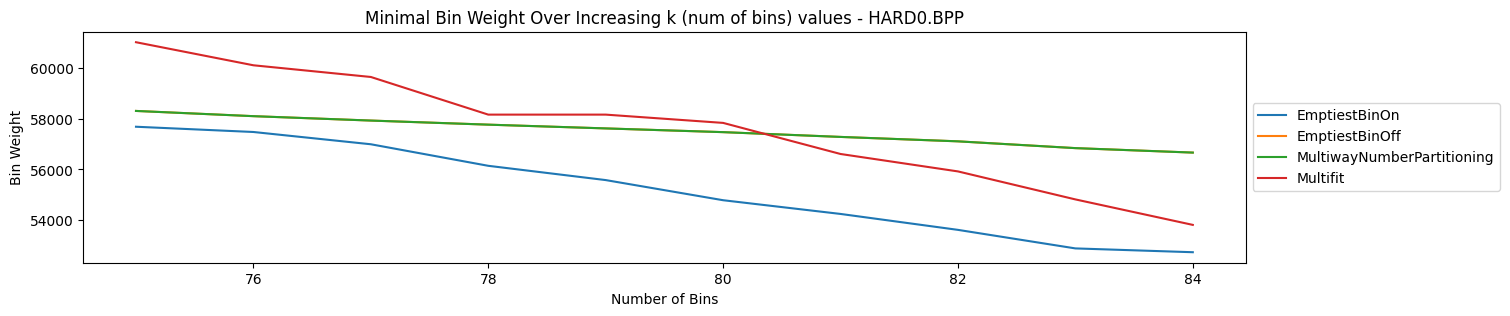

In [27]:
plt.figure(figsize=(15,3))

for i in min_var:
    plt.plot([j for j in min_var[i]], min_var[i].values(), label = i)

plt.xlabel('Number of Bins')
plt.ylabel('Bin Weight')
plt.title('Minimal Bin Weight Over Increasing k (num of bins) values - HARD0.BPP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

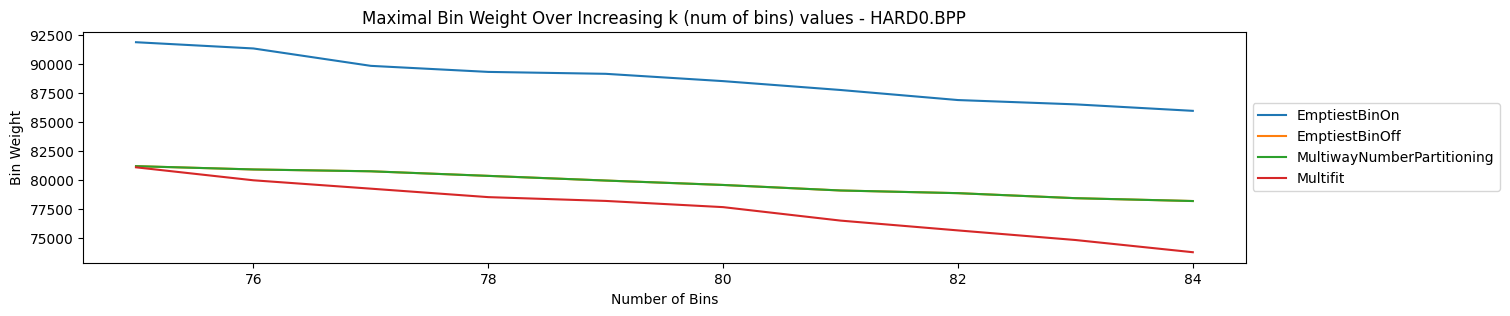

In [28]:
plt.figure(figsize=(15,3))

for i in max_var:
    plt.plot([j for j in max_var[i]], max_var[i].values(), label = i)

plt.xlabel('Number of Bins')
plt.ylabel('Bin Weight')
plt.title('Maximal Bin Weight Over Increasing k (num of bins) values - HARD0.BPP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Analyzing The Results
Throughout all the results, EBOff and MultiwayNumberPartitioning (base) perform the exact same which is why one of them does not appear on the graph. 

#### Maximal Bin Weight
We observe that for a fixed and variable k value EBOn maintains the largest maximal bin value and Multifit the lowest. Therefore, it can be concluded that Multifit minimizes the strain on any single bin when applied and that this strain decreases as we increase the number of bins. EBOff and the base MultiwayNumberPartitioning (base) perform worse than Multifit, but better than EBOn.

#### Minimal Bin Weight
For a low value of k, Multifit maximizes the minimal bin weight, but as k grows, it gets surpassed by base/EBOff. EBOn maintains the smallest minimal binweight in all cases and values of k

#### What does this mean?
For applications which you want to minimize the strain on a single bin (for whatever intepretation of bin you choose), it would be best to use the multifit algorithm to divide the weights amongst your bins. For applications in which you want to divide the load while also minimizing the number of bins used, Multifit performs best when you have a low number of bins available, but if you have a high number of bins, EBoff/base perform the best.


We observe that Multifit minimizes the Maximal bin weight throughout multiple test cases at a fixed K variable. Additionally, it maintains the lowest maximal weight at a single testcase with various values of b, but we see that its maximal binweight will rise above the base case and EBoff if we continue to decrease the value of K. For lowest
EmptiestBinOn (EBOn) performs the worst out all the algorithms, as it is the only online algorithm. It always has the height maximal bin weight for any case and value of k by a large margin and the smallest minimal bin value.

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

### Maged
#### Backward
Initially, there was a learning curve with understanding the existing code base provided to us. I was unfamiliar with some of the notation and techniques utilized, but after some time, I was familiar with the code base and was able to begin the tasks. When completing a task, we began by reading it over a few times, implementing rough drafts, and refining our code to match the standard of the code base. We wanted to ensure our code looked like an extension of the original code base. Following our implementations, we would begin analyzing our results. Our group had a goal of accomplishing one of the given tasks per given lab period and using the last period as a time to finalize our report/codebase. This goal helped keep us on track and quantify how behind/ahead we were in our work. In hindsight, it's ironic we took this approach because it was similar to the previous way tasks were organized in the last lab, but was changed since the schedule made people feel they were behind on their work. In terms of coding the bin packing algorithms, it was simple to implement them as all of them had succinct explanation available or were simple algorithms.

#### Inward
Our standards for this lab were the existing codebase and the descriptions of the algorithms online. As I stated earlier, we wanted our code to look like an extension of the code base, and we feel like we met this standard, especially for the algorithm portion of the code. For our benchmarking, I do believe there is some room to improve our benchmarking functions, particularly with recording the output. While we are aware there was a more efficient way to extract and plot the data, this method was sufficient for the task given. Additionally, it felt unnecessary to implement a reader for the JSON outputs of the benchmark, especially when we had other tasks to finish. Overall, I would say I'm satisfied with our work, but I do believe there is some room for improvement with our benchmarking methods, we believe if we were to do another Python lab, we would have an easier time benchmarking since we're more experienced now. 


#### Outward
One thing I want people to notice about our work is the algorithms files and the adapter class used for T5. All of our algorithms blend into the original code base really well (something we really wanted to achieve during this lab) and by using the adapter class (Multiway Adapter), we were able to reuse our BinPPReader and Jburkardt reader. Secondly, I would like to showcase the results of our KPI analysis. We are happy in our choice of KPIs for T5 and our we believe our graphs (the choice of x axis, test case, and presentations) do a good job of conveying which algorithms perform well for what KPI one would be interested in.

#### Forward
The things I learned from this lab are technical skills from the existing codebase. Before this lab, I was unfamiliar with implementing abstract methods, abstract classes, or using ABC for inheritance. Throughout the lab, I found most of the difficulty not with implementing the algorithms or accomplishing the tasks but with keeping my code concise. These new techniques I learned from this lab will help me develop cleaner, more scalable code for a long time in the future, and I am grateful I did this lab.

### Jinal
#### Backward
The process that I went through to produce the final result was quite rigorous. From the beginning, it was definitely less intimidating than I found the first lab, but there was still lots of work to get done. I believe the decision to provide the class with a more structured initial code base was a beneficial one for me, as it gave me a template to try and follow for my own code which would later be added to the structure. In terms of the delivery of tasks, I believe a very vital decision that our group made was planning to complete one task per supervised lab period. This set us up to complete all 5 main tasks within the 2 week span of the lab, while leaving us with an extra lab period to wrap up and potentially attempt the bonus task as well. Although we were not able to precisely follow this plan for the duration of the 2 weeks (with midterms and assignments for other courses getting in the way), we were able complete all 5 main tasks with a quality of work that meets our standards, due to the fact that we began the lab with that goal in mind. This was extremely useful for me personally, as I often find myself procrastinating and not giving myself ample amount of time to complete individual assignments or assessments effectively. Regarding the technical work on the project, I found the difficulty of the algorithm implementations a bit easier than lab 1, but since there were more algorithms to implement, it took relatively the same amount of time. In conclusion, the process to produce this result was one that involved planning to ensure tasks were completed efficiently and effectively, along with putting in the required time and effort to meet the requirements of the project. 

#### Inward
I would say that my standards for this project were quite high. Although I understand that this course is one that comes with its hardships, being aptly named "Binding Theory to Practice", I also believe that Maged and I are capable of producing high quality work. I expected that we would be able to complete all of the tasks presented in the lab by using our joint efforts to write code that fit the code base well and performed well against the baseline. I am certainly satisfied with the work that we produced and I do believe that the high standards that I set for myself and this group were met in the end. It should be mentioned of course, that no work is going to be perfect, and something I would've liked to complete if this project were done again would be the bonus task. On top of that, I would also have liked to try and implement at least one or two more algorithms for T4 and T5, just to have more of an ability to analyze the difference between certain approaches to the different bin packing problems.

#### Outward
One thing that I would like to be noticed for this lab is the matplotlib integration for graphing results in our repository, as well as the report. As opposed to the first lab, where all of the graphing for the benchmarks was done through excel, I think that the integration of matplotlib into this project is very straightforward and effective. Again, the integration was not perfect, as the exportation of benchmark results for runtime through pyperf into a readable JSON file could have made our report entirely independent of image attachments. This was a tradeoff that we found quite reasonable however, as we ran into multiple errors while attempting to export the pyperf results by following the steps outlined by the instructor in response to a Microsoft Teams post from another student. The compromise was to record the results from the benchmarks in a seperate file (analysis_tools/graph_bench_results.py) which still uses matplotlib to export the benchmark graphs to .png images that were later "attached" into the report. 

#### Forward
One of the lessons that I'll take away from this lab and corresponding lectures/readings is not to be afraid to try and trusting my knowledge/work. Before getting started on the T5 algorithm, I spoke to Maged and I told him that I would be comfortable starting to work on a T5 algorithm on my own, while he finished his work on T4. This resulted in the creation of the Multifit algorithm, which although I knew fit the description on the [Wikipedia page](https://en.wikipedia.org/wiki/Multifit_algorithm), I found that the solution did not match that of the baseline in many cases. As such, I was a bit embarassed by my work and advised Maged that maybe a different algorithm would need to be implemented instead. It was only after bringing it up again while wrapping up our report, where we decided to restore the algorithm in our working path and benchmark the solutions against the EmptiestBin algorithm that Maged implemented. It was astonishing to find that in certain cases, Multifit actually performed significantly better than both the EmptiestBin and Baseline algorithm. Therefore, I believe its important to not only take pride in the work that you do, but also don't be afraid to try and fail, because the worst thing that could come out of it is a learning experience that can be used to inform future decisions.